Statistical Learning - Project

In [22]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#Read the data as a data frame
df = pd.read_csv("OneDrive/pgp/Project/statistics/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
#Shape of the data
print(df.shape)

(1338, 7)


In [26]:
#Data type of each attribute
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [27]:
#Checking the presence of missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
#5 point summary of numerical attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


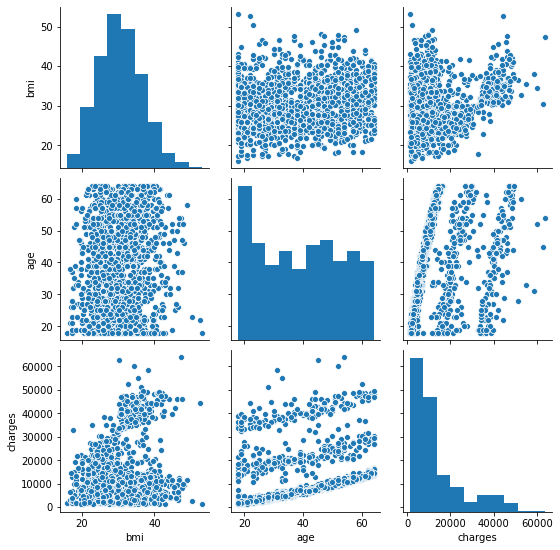

In [3]:
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
sns.pairplot(df[['bmi','age','charges']]);

In [6]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
skewness = pd.DataFrame({'skewness':[stats.skew(df.bmi),
                                     stats.skew(df.age),
                                     stats.skew(df.charges)]},
                        index = ['bmi','age','charges'])

skewness

,skewness
bmi,0.283729
age,0.055610
charges,1.514180


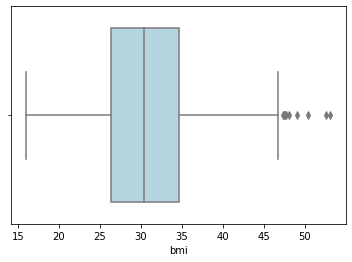

In [36]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns
sns.boxplot(x=df.bmi,color='lightblue');

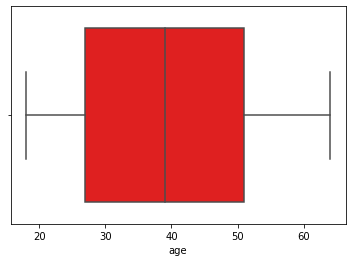

In [37]:
sns.boxplot(x=df.age,color='red');

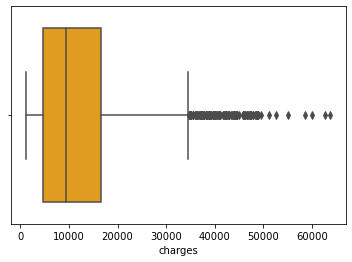

In [38]:
sns.boxplot(x=df.charges,color='orange');

In [ ]:
# Distribution of categorical columns
sns.catplot(x="bmi",y="age",hue="charges",data = df,kind = "box");

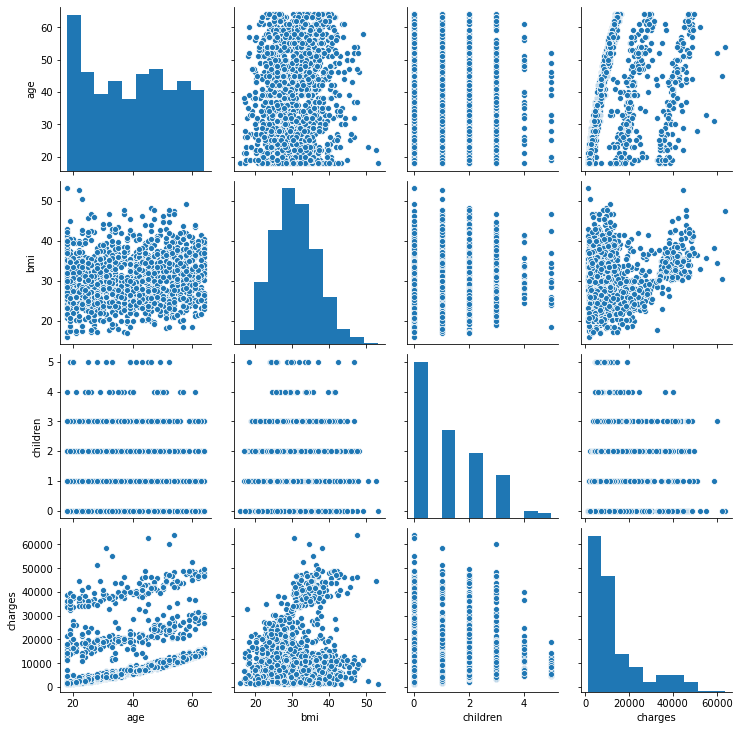

In [7]:
# Pair plot that includes all the columns of the data frame
sns.pairplot(df);

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


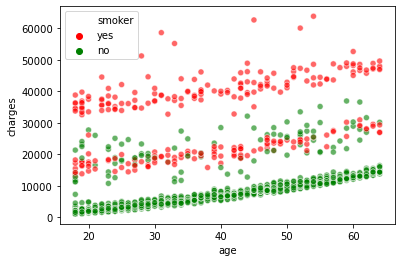

In [17]:
# Do charges of people who smoke differ significantly from the people who don't?

sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
Ho = "Charges of smoker and non-smoker are same"  
Ha = "Charges of smoker and non-smoker are not the same"   

x = np.array(df[df.smoker == 'yes'].charges)  
y = np.array(df[df.smoker == 'no'].charges) 
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

In [18]:
# Does bmi of males differ significantly from that of females
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [19]:
Ho = "Gender has no effect on bmi"   
Ha = "Gender has an effect on bmi" 

x = np.array(df[df.sex == 'male'].bmi)  
y = np.array(df[df.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [20]:
# Is the proportion of smokers significantly different in different genders

Ho = "Region has no effect on smoking habits"   
Ha = "Region has an effect on smoking habits" 

crosstab = pd.crosstab(df['smoker'], df['region'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [ ]:
# Is the distribution of bmi across women with no children, one child and two children, the same

Ho = "No of children has no effect on bmi"   
Ha = "No of children has an effect on bmi"   
female_df = df.copy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round()}) > 0.05')